### <p style="text-align: right;"> &#9989; **Haoyan Lin** </p>
#### <p style="text-align: right;"> &#9989; Larissa Ford, Thanh lai, Connor Kromp, Dongdong Li</p>

# Day 15 In-Class Assignment: Introduction to Machine Learning

1. **Scientific motivation** 
    - Classifying data (iris types) 
2. **Modeling tools** 
    - Machine Learning (Perceptron)
3. **Programming concepts** 
    - Creating Classes and re-usable code
    - Pulling in data from outside sources 
    - Using external libraries 
    

### Agenda for today's class

</p>

1. Review of pre-class assignment
1. Problem Statement
1. Basics of the perceptron model
1. Loading and inspecting the data
1. Building the perceptron model
1. Plotting the decision boundary


## The Perceptron Model

The perceptron is one of the first used examples of what has come to be called a neural network. Invented in 1958, it was originally hailed as a way to achieve what had come to be called "Artificial Intelligence". However, it was quickly proved that the perceptron model was limited. The claims and subsequent refutations halted neural network research for a number of years.

Perceptrons are used as a kind of **classifier** that we can train using examples. The simplest perceptron is what is known as a binary classifier. By this we mean that, we can provide individual examples of two classes (remember, a binary classifier) where the individuals are represented by some number of features/inputs. All examples use the same input features, but the particular feature values are used for the classification process. The goal is the create the classifier such that, when a never-seen-before individual is provided to the perceptron, it can correctly determine that individual's class

There are ways to extend the perceptron's ability to deal with multiple classes (to classify the inputs as representing one of `n` classes instead of only two), but for this exercise we will only be concerned with a binary classifer.

The limitations of a binary perceptron are that the classes must be **linearly separable**. It is easier to show than to explain. Look at the two graphs below. The axes represent the range of values for the two input features. The dots represent individual input examples based on their corresponding feature values and the colors represent the class that each individual example belongs to. 

<img src="https://i.imgur.com/pU70IHB.png">

For experiment A, it is clear that we can draw a line through the 2D input/feature space such that we can separate the examples of the two classes. For experiment B, no such line separating the two classes exists. Furthermore, it is also clear that we could draw **many** lines for A such that we separate the two classes. 

The limitations therefore are:
- a perceptron can only classify elements that are linearly separable
- a perceptron cannot distinguish which linear boundary is "better".

## It's a line

The way to think about a perceptron then is that it is learning a line through the feature space. We will discuss that in a minute but accepting that is true, what is a line? A line is just a simple equation with the following form:

$$y = mx + b $$

Where `m` is the slope and `b` is the intercept. We are going to train our perceptron such that it finds `m` and `b` where that particular line separates two classes.

## The setup

We are going to setup our perceptron as shown in the image below:

<img src="https://i.imgur.com/gz05jKe.png">

Remembering that each individual example is represented as a set of features, a **vector** of features, we provide a **weight** associated with each feature input. When the features of a individual example is provided, we multipy each input by its associated weight and sum those products together. 

You may think of this process as multiplying two vectors (the input vector and the weight vector) together, index to index, and summing the resulting products as what is called the **dot product**. You might note that `numpy` provides such a function.

Having obtained the dot product of feature inputs and weights, we add what is called a **bias term**. The bias is also associated with a weight (the constant 1 at the top of the inputs) though it's value is constant for all inputs. Altogether the dot product represents the `m` of our line equation and the bias represents the `b` of that equation. 

Having obtained the result, we pass that result through an **activation function**. Our activation function is typically a step function such that it yields either 1 or -1 indicating whether the particular input is part of one class (1) or the other (-1). Remember, binary classifier.

# 4. Loading and inspecting the data

Before we build a machine learning model, we need data to base it off of. The data set we are going to use has been provided for you in the directory for this assignment, `binary-iris.csv`. It is a variation on a classic, simple classification data set for iris flowers from 1936. It is used often as a very simple test of learning systems. The original (see https://en.wikipedia.org/wiki/Iris_flower_data_set ) has 4 classes and 4 inputs, for our experiments we have modified the file to have only 2 inputs and 2 classes. 

**Load the data into python and visualize (with a plot) to get a sense for what it looks like. Use different colors to represent the two different iris classifications.**

As an aside, try to do it without use Pandas. Let's see if we can get used to opening files and manipulating the strings we get from the file. If that proves too difficult, go ahead and use Pandas.

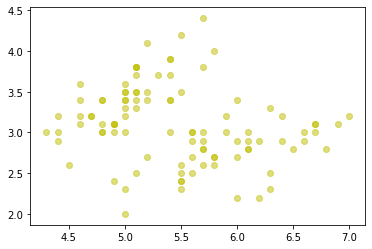

In [11]:
# Do This: Load in the iris.csv file and plot the data based on the iris classifications
import numpy as np
import matplotlib.pyplot as plt
sepal_length, sepal_width = np.loadtxt("binary-iris.csv", usecols = (0,1), unpack = True, skiprows = 1, delimiter = ',')


plt.scatter(sepal_length, sepal_width, color = "y",alpha=0.5)
plt.show()

## Build a Perceptron class (first cut)

Let's build a perceptron class but let's skip the learning process for the moment. Here's what we need before adding learning:
- The class needs a `__init__` method. 
  - It takes as arguments the labeled data (the data features plus a label at the end)

  - it creates an instance variable `data` for the data from the file. It should contain 2D vector where each row represents an example. The row should consists of two features and a class. The classes should be modified for 1 (iris setosa) and -1 (iris versicolor). 

  - it creates a 1D weight vector `weights` of the same shape as the number of features + 1. The **plus 1** is for the bias weight. For now, fill the weights with some value (say 1.0). We'll fix that later. 
  - it creates a constant bias value `bias`

- The class needs a `predict` method which takes a single argument, an array of features from a single example in the data set. It will do the following:
   - multipy (as a dot product) the argument feature vector and the weights
   - multiply the bias by its weight. Add that to the result.
   - Apply the activation to the result to say whether the class of that input is -1 vs 1
   - return that predicted class value

In [41]:
## write your class code here


class Perceptron():
     def __init__(self, weights, bias):
         self.w = weights
         self.b = bias

Run your code with the main below. See if it works, even though it is not yet a very good classifier.

In [46]:
## get data from file, just using file and string ops
f = open("binary-iris.csv")
header = next(f) # dump the header line
data = []
for line in f:
    fields = line.split(",")
    # need to strip label because, as the last element, it has a \n
    label = (1.0 if fields[2].strip() == "Iris-setosa" else -1.0)
    # the fields are strings until we conver them
    data.append([float(fields[0]), float(fields[1]), label])
f.close()

p = Perceptron(data)
print("weights: ", p.weights)
print("bias: ", p.bias)
print("prediction: ",p.predict([1,1])) # some arbitrary feature vector, just testing here
print(p.data)

TypeError: __init__() missing 1 required positional argument: 'bias'

## Learning

OK, now the interesting part. We need to learn the value of the weights, including the value of the bias weight, so that the predictions the `predict` method makes are good. How to do that?

The basic idea is this. We feed in the data that we have where we know the labels (and we do) to `predict`. We then compare the classification we want (from the existing data) and the classification we got (from the `predict` method). We use that difference to update **all the weights**. We do this for **each** of the data. 

However, we need to do one more thing. We need to not **over correct** the weights. If we do that then the weight values might swing wildly over time and never settle down. So we also provide a `learning_rate`. This rate reduces how much the weight changes. Overall then we use the following equation:

$$ self.weights[i] = self.weights[i] +  self.learning\_rate * (class\_label - prediction\_label) * input[i] $$

We do this for each input of the example and each corresponding weight. We also include the bias weight. We do this for some number of iterations because, with a small `learning_rate`, we need to repeat the process to get the weight values correctly set. We also update the bias weight each time we update a weight. We use the same difference, `class_label-prediction_label` for that update (even though there is no label for the bias). If `weights[0]` is the bias weight, then that equation would be

$$ self.weights[0] = self.weights[0] + learning\_rate * (class\_label - prediction\_ label) $$

## Modify our Perceptron class

We need to update our `Perceptron` class to deal with learning. Copy the class you wrote from above in the cell below and make the following changes:

- `__init__` besides labeled data, it takes two more parameters: the number of iterations of learning you want and the learning_rate. They should be also stored as instance variables
- a method called `fit`. It performs the number of iterations of learning provided in `__init__` on all the labeled data as described
- method called `errors`. It will print out the number of errors on predicted vs actual class labels and the weights at the end of the run.

In [53]:
## write your updated class code here
class Perception():
    def _init_(self, fit,errors):
        self.f = fit
        self.e = errors
    
    

Run your code with the code below. Change the number of iterations, the learning rate, and see what happens. Make sure `errors` prints out the weights as you will need them below.

In [50]:
f = open("binary-iris.csv")
header = next(f) # dump the header line
data = []
for line in f:
    fields = line.split(",")
    # need to strip label because, as the last element, it has a \n
    label = (1.0 if fields[2].strip() == "Iris-setosa" else -1.0)
    # the fields are strings until we conver them
    data.append([float(fields[0]), float(fields[1]), label])
f.close()
    
p = Perceptron(data, 10, 0.01)
p.fit()
p.errors()

TypeError: __init__() takes 3 positional arguments but 4 were given

## Plot the decision boundary

If you have made it this far, we can try and visualize this.

Once we have run the math, we can try and plot the decision boundary as well as the data entries. Let's do some more math. **Remember** the actual bias is the bias constant you used time the bias weight (typically the first weight)

Our basic calculation is $w \cdot x + b = 0 $ where `w` and `x` are vectors and the operation $\cdot$ is the dot product. Since this is in two dimensions (two features for an input), we can rewrite this as: $w_1 * x_1 + w_2 * x_2 + b = 0$. 

That looks a lot like an equation of a line in the form of $Ax + By - C = 0$ if we assume $x_1 == x$ and $x_2 == y$. Let's isolate the x and y intercept:

$ x = \frac{-(b - w_2*y)}{w_1} $ but if $y=0$ (which it does at the x intercept) then $x = \frac{-b}{w_1}$

$ y = \frac{-(b - w_1*x)}{w_2}$ but if $x=0$ (which it does at the y intercept) then $y = \frac{-b}{w_2}$

We get the following then:

$slope = -\frac{w_1}{w_2}$ and $intercept = \frac{-b}{w_2}$

Plug in your weights and plot the line. Plot the data as well where they are colored to indicate which class they belong to.

The data should be stored in the `Perceptron` instance. Get the weights (which `error` should print out) and plot the line. The separate the two classes and plot each as a different color.


In [ ]:
## write your code here to plot the decision boundary. Use the weights from above
figure = plt.figure(figsize=(12, 10))
b = 0.02
w = 1
# iterate over datasets
for ds in f:
    
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset 'f' first
    cm = plt.cm.jet
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(f), len(treeclassifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
    # and testing points
    # ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
 
    
    


-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2019,  Michigan State University Board of Trustees